<a href="https://colab.research.google.com/github/chellabeatrixkiddo/ML_and_DL/blob/master/CV_AnalyticsVidhya/male_vs_female_classification/male_vs_female_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/DLDatasets/CV101/datasets/male_vs_female_classification')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten

%matplotlib inline

## **Load Data and Preprocess**

In [0]:
## Import and preprocess dataset. Since the actual training dataset contains around 12196 images, we are training 
## using only 2001 images. The actual test dataset contains 5227 images and we are going to use 1001 of them


traindata = pd.read_csv("/content/drive/My Drive/DLDatasets/CV101/datasets/male_vs_female_classification/train.csv")

testdata = pd.read_csv("/content/drive/My Drive/DLDatasets/CV101/datasets/male_vs_female_classification/test.csv")

X_train = []
X_test = []

train_count = 0
test_count =0

for img_name in traindata.image_names:
    img = plt.imread('/content/drive/My Drive/DLDatasets/CV101/datasets/male_vs_female_classification/images/' + img_name)
    X_train.append(img)
    train_count += 1
    if train_count > 2000:
      break

for img_name in testdata.image_names:
    img = plt.imread('/content/drive/My Drive/DLDatasets/CV101/datasets/male_vs_female_classification/images/' + img_name)
    X_test.append(img)
    test_count += 1
    if test_count > 1000:
      break
    

X_train = np.array(X_train)
X_test = np.array(X_test)

  

In [16]:
X_train.shape, X_test.shape

((2001, 224, 224, 3), (1001, 224, 224, 3))

In [6]:
y_train = traindata.loc[:2000]['class']
y_train = to_categorical(y_train)
y_train.shape

(2001, 2)

In [0]:
X_train_vgg = preprocess_input(X_train, mode='tf')
X_test_vgg = preprocess_input(X_test, mode='tf')

## **Using Pretrained VGG-16 Model**

In [0]:
## Using Pretrained VGG-16 architecture

base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
base_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool

In [0]:
base_model_pred = base_model.predict(X_train_vgg)
base_model_pred_test = base_model.predict(X_test_vgg)

In [0]:
base_model_pred = base_model_pred.reshape(2001, 7*7*512)

base_model_pred_test = base_model_pred_test.reshape(1001, 7*7*512)


In [0]:
max_val = base_model_pred.max()

base_model_pred = base_model_pred / max_val
base_model_pred_test = base_model_pred_test / max_val

In [0]:
model = Sequential()
model.add(InputLayer((7*7*512, )))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [0]:
model.compile(optimizer='sgd', metrics=['accuracy'], loss='categorical_crossentropy')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(base_model_pred, y_train, epochs=15)


Epoch 1/15
2001/2001 [==============================] - 16s 8ms/step - loss: 0.6889 - acc: 0.5257
Epoch 2/15
2001/2001 [==============================] - 15s 8ms/step - loss: 0.6758 - acc: 0.6037
Epoch 3/15
2001/2001 [==============================] - 15s 8ms/step - loss: 0.6656 - acc: 0.6277
Epoch 4/15
2001/2001 [==============================] - 15s 8ms/step - loss: 0.6558 - acc: 0.6507
Epoch 5/15
2001/2001 [==============================] - 15s 8ms/step - loss: 0.6467 - acc: 0.6427
Epoch 6/15
2001/2001 [==============================] - 15s 8ms/step - loss: 0.6400 - acc: 0.6707
Epoch 7/15
2001/2001 [==============================] - 15s 8ms/step - loss: 0.6269 - acc: 0.6852
Epoch 8/15
2001/2001 [==============================] - 15s 8ms/step - loss: 0.6179 - acc: 0.6947
Epoch 9/15
2001/2001 [==============================] - 15s 8ms/step - loss: 0.6107 - acc: 0.6972
Epoch 10/15
2001/2001 [==============================] - 15s 8ms/step - loss: 0.5994 - acc: 0.7091
Epoch 11/15
2001/20

In [0]:
predictions = model.predict_classes(base_model_pred_test)
predictions

In [0]:
prediction_probabilities = model.predict(base_model_pred_test)
prediction_probabilities

## **Using CNN Model**

**Data Prep and Validation Split**

In [0]:
y_train = traindata.loc[:2000]['class']

X_train = X_train / X_train.max()

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.3, random_state=42)

**Model Building**

In [18]:
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 112, 112, 125)     9500      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 150)       468900    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 150)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 200)         270200    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 225)         405225    
_________________________________________________________________
flatten_2 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               90100     
__________

**Model Training**

In [20]:
model.fit(X_train, y_train, epochs=20,validation_data=(X_valid,y_valid))

Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 412s 294ms/step - loss: 0.7156 - acc: 0.4971 - val_loss: 0.6891 - val_acc: 0.5324
Epoch 2/20
1400/1400 [==============================] - 408s 292ms/step - loss: 0.6597 - acc: 0.6036 - val_loss: 0.6667 - val_acc: 0.6489
Epoch 3/20
1400/1400 [==============================] - 410s 293ms/step - loss: 0.6412 - acc: 0.6314 - val_loss: 0.6370 - val_acc: 0.6323
Epoch 4/20
1400/1400 [==============================] - 413s 295ms/step - loss: 0.6091 - acc: 0.6521 - val_loss: 0.6016 - val_acc: 0.6988
Epoch 5/20
1400/1400 [==============================] - 413s 295ms/step - loss: 0.5348 - acc: 0.7350 - val_loss: 0.4929 - val_acc: 0.7787
Epoch 6/20
1400/1400 [==============================] - 412s 294ms/step - loss: 0.4667 - acc: 0.7736 - val_loss: 0.5966 - val_acc: 0.6456
Epoch 7/20
1400/1400 [==============================] - 412s 294ms/step - loss: 0.4386 - acc: 0.8121 - val_loss: 0.4739 - val

**Predict Classes on Test Data**

In [24]:
X_test = X_test / X_test.max()


predictions = model.predict_classes(X_test)
predictions

prediction_probabilities = model.predict(X_test)
prediction_probabilities


array([[0.9927583 ],
       [0.9985985 ],
       [0.01131603],
       ...,
       [0.00511933],
       [0.9735877 ],
       [0.58453184]], dtype=float32)

In [0]:
rng = np.random.RandomState(42)

cl_enum = {1:"male", 0:"female"}

There is 2 % chance that it is a male
Predicted Class: female


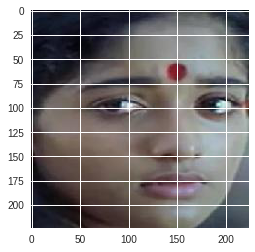

In [60]:
test_images = testdata.loc[:1000]['image_names']

imgname = rng.choice(test_images)

prob = (prediction_probabilities[:, 0] * 100).astype(int)[np.where(test_images == imgname)[0][0]]

cl = (predictions).astype(int)[np.where(test_images == imgname)[0][0]]

img = plt.imread('/content/drive/My Drive/DLDatasets/CV101/datasets/male_vs_female_classification/images/' + imgname)

print('There is', prob, '% chance that it is a male')
print('Predicted Class:', cl_enum[cl[0]])

plt.imshow(img)
